In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv')
train_bkp=train.copy()

# New Section

In [ ]:
train.shape

(54808, 14)

In [ ]:
test=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test.csv')
test_bkp=test.copy()

In [ ]:
test.shape

(23490, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
ignored_cols=['employee_id']
for col in train.drop(columns=ignored_cols):
    print( " {}-{} contains {} values and values are {}".format(col,(train[col].dtype),train[col].nunique(),train[col].unique()))

 department-object contains 9 values and values are ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
 region-object contains 34 values and values are ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
 education-object contains 3 values and values are ["Master's & above" "Bachelor's" nan 'Below Secondary']
 gender-object contains 2 values and values are ['f' 'm']
 recruitment_channel-object contains 3 values and values are ['sourcing' 'other' 'referred']
 no_of_trainings-int64 contains 10 values and values are [ 1  2  3  4  7  5  6  8 10  9]
 age-int64 contains 41 values and values a

In [ ]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
train.groupby('education').size()

,0
education,
Bachelor's,36669
Below Secondary,805
Master's & above,14925


In [ ]:

# Check
# train['education'] = train['education'].fillna("Bachelor's")

In [ ]:
train[train['previous_year_rating'].isna()].groupby('is_promoted').size().reset_index(name='NaN_Count')

,is_promoted,NaN_Count
0,0,3785
1,1,339


In [ ]:
train[train['is_promoted']==0]['previous_year_rating'].mean()

3.267910689246036

In [ ]:
train[train['is_promoted']==1]['previous_year_rating'].mean()

3.986139986139986

In [ ]:
# train[(train["previous_year_rating"].isna()) && (train["is_promoted"]=1)  ].fillna("4.")
# Check
# train['previous_year_rating'] = train['previous_year_rating'].mask(
#     (train['previous_year_rating'].isna()) & (train['is_promoted'] == 1) ,
#     4.0
# )
# train['previous_year_rating'] = train['previous_year_rating'].mask(
#     (train['previous_year_rating'].isna()) & (train['is_promoted'] == 0) ,
#     3.0
# )


In [ ]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
train['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


In [ ]:
ignored_cols=['employee_id']
target_col=['is_promoted']
numeric_cols=['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']
category_cols=['region','department','education','gender','recruitment_channel']

In [ ]:
# train['region']=train['region'].str.split("_").str[1].astype(int)

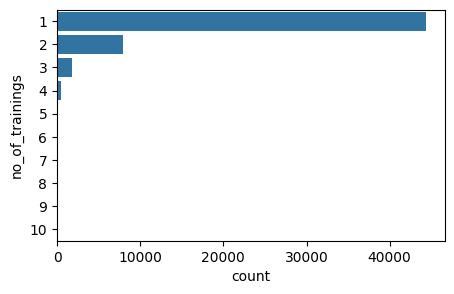

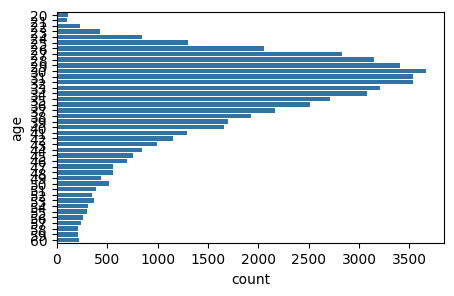

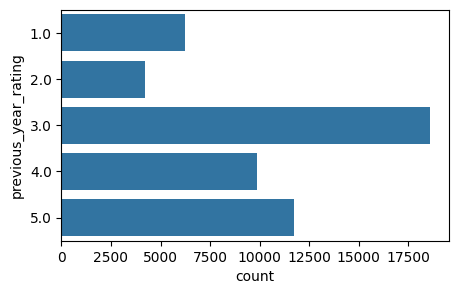

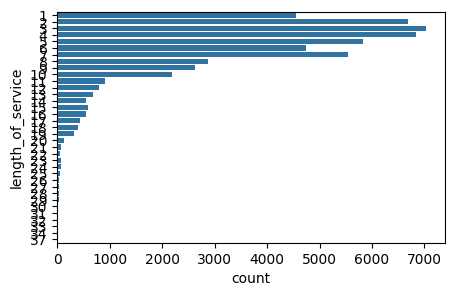

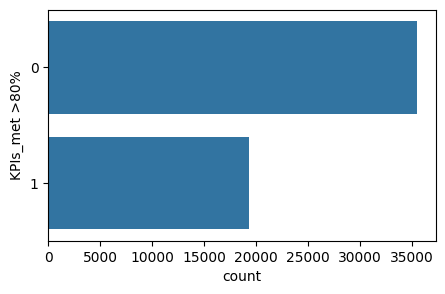

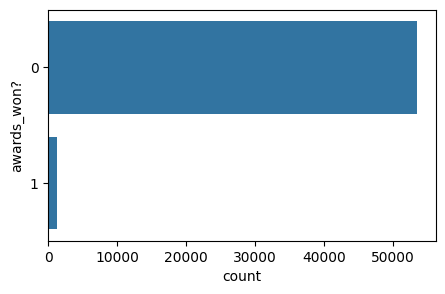

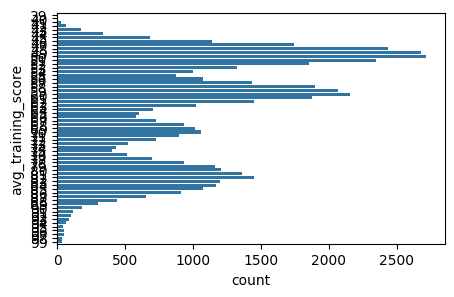

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

# Observation :

#### --> Almost 80% employees completed only one training
#### --> Average Previous year rating is 3.3 with only 40% employees with on and above 4-star ratings in previous year.
#### --> Even employees who had completed "80% of KPI", only 35% of them got promoted.
#### --> When the length of service increases, getting promotion is DECREASED !!

In [ ]:
train.previous_year_rating.value_counts()

,count
previous_year_rating,
3.0,18618
5.0,11741
4.0,9877
1.0,6223
2.0,4225


In [ ]:
train.groupby('KPIs_met >80%')['is_promoted'].value_counts().unstack()

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


<Axes: xlabel='previous_year_rating,is_promoted'>

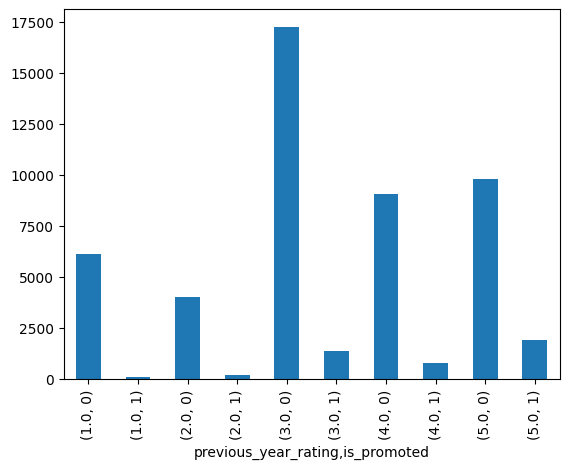

In [ ]:
train[['previous_year_rating','is_promoted']].groupby('previous_year_rating').value_counts().plot(kind='bar')


<Axes: xlabel='length_of_service,is_promoted'>

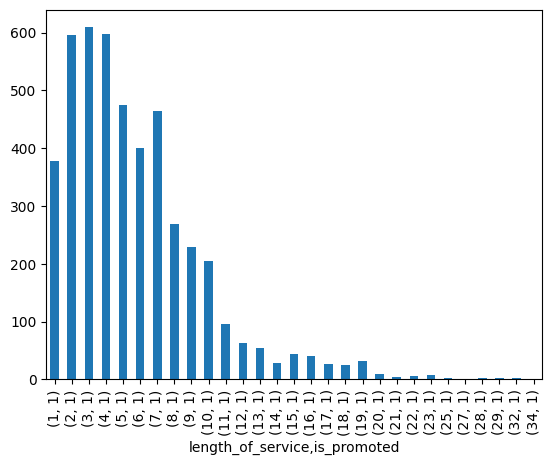

In [ ]:
filtered_df = train[ (train['is_promoted'] == 1)]

filtered_df[['length_of_service','is_promoted']].groupby('length_of_service').value_counts().plot(kind='bar')


<Axes: xlabel='education,is_promoted'>

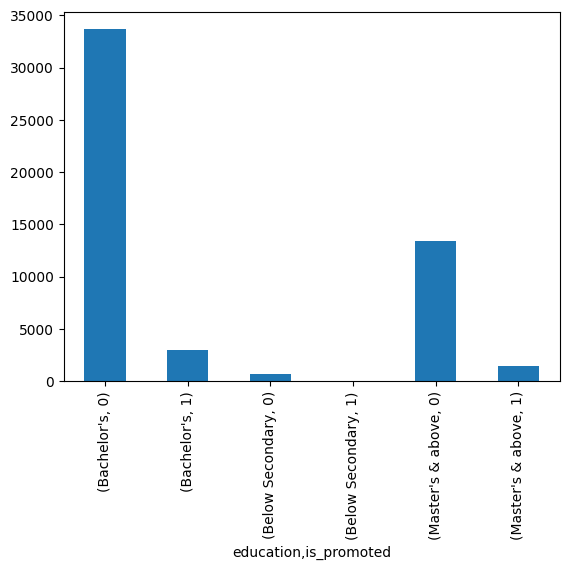

In [ ]:
train[['education','is_promoted']].groupby('education').value_counts().plot(kind='bar')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [ ]:
category_tasks = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

numeric_tasks = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')),
    ('scale',StandardScaler()) # standard scaler
])


preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',category_tasks,category_cols),
        ('num_encode',numeric_tasks,numeric_cols)
    ]
)

In [ ]:
model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [ ]:
x = train.drop(columns=ignored_cols+target_col)
x.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [ ]:
y=train['is_promoted']

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(43846, 12) (10962, 12) (43846,) (10962,)


In [ ]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'department',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [ ]:
model_pipeline.fit(train_x,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'department',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [ ]:
model_pipeline.predict_proba(test_x)

array([[0.67998652, 0.32001348],
       [0.97659964, 0.02340036],
       [0.67086666, 0.32913334],
       ...,
       [0.99184137, 0.00815863],
       [0.64219833, 0.35780167],
       [0.99671505, 0.00328495]])

In [ ]:
model_pipeline.predict(test_x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# evaluation method

def model_train_val_eval(train_X,test_x,train_y,test_y,model_pipeline):

    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_test_tgt = model_pipeline.predict(test_x)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(test_y,predicted_test_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(test_y,predicted_test_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(test_y,predicted_test_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(test_x)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(test_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr)
    plt.show()

Train AUC
0.6272161041707893
Valid AUC
0.6250887894125233
Train cnf_matrix
[[39903   218]
 [ 2757   968]]
Valid cnf_matrix
[[9965   54]
 [ 702  241]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     40121
           1       0.82      0.26      0.39      3725

    accuracy                           0.93     43846
   macro avg       0.88      0.63      0.68     43846
weighted avg       0.93      0.93      0.92     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10019
           1       0.82      0.26      0.39       943

    accuracy                           0.93     10962
   macro avg       0.88      0.63      0.68     10962
weighted avg       0.92      0.93      0.91     10962



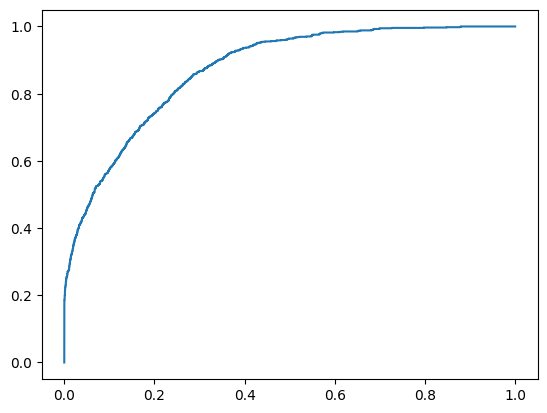

In [ ]:
model_train_val_eval(train_x,test_x,train_y,test_y,model_pipeline)


In [ ]:
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }
]

In [ ]:
grid = GridSearchCV(estimator=model_pipeline, param_grid=params,
                    cv=2, scoring='roc_auc')

In [ ]:
grid.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['region',
                                                                          'department',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [ ]:
grid.best_params_


{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}

In [ ]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.876282,1
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.873318,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.874051,2
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.873318,3


Train AUC
0.6234413616929594
Valid AUC
0.6210965337650616
Train cnf_matrix
[[39934   187]
 [ 2788   937]]
Valid cnf_matrix
[[9970   49]
 [ 710  233]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     40121
           1       0.83      0.25      0.39      3725

    accuracy                           0.93     43846
   macro avg       0.88      0.62      0.68     43846
weighted avg       0.93      0.93      0.92     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10019
           1       0.83      0.25      0.38       943

    accuracy                           0.93     10962
   macro avg       0.88      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962



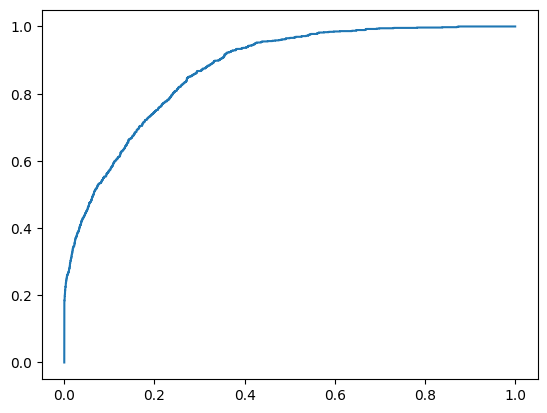

In [ ]:
new_model=grid.best_estimator_
model_train_val_eval(train_x,test_x,train_y,test_y,new_model)


In [ ]:
# !pip install xgboost

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over_sampling = RandomOverSampler()


In [ ]:
train_x_os, train_y_os = over_sampling.fit_resample(train_x,train_y)


In [ ]:
train_y_os.value_counts()


,count
is_promoted,
0,40121
1,40121


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [ ]:
# params_3 = [
#     {
#     'model': [LogisticRegression()],
#     'model__penalty':['l2',None],
#     'model__C':[0.5,3]
#     },
#     {
#     'model': [DecisionTreeClassifier()],
#     'model__max_depth':[3,5]
#     },
#     {
#     'model': [StackingClassifier(
#     estimators=[
#         ['sclf1',RandomForestClassifier()],
#         ['sclf2',GradientBoostingClassifier()],
#         ['sclf3',AdaBoostClassifier()],],
#         final_estimator=LogisticRegression()

#     )],
#     'model__sclf1__max_depth':[4,8],
#     'model__sclf2__n_estimators':[12,15,25],
#     'model__sclf3__n_estimators':[3,5,35],
#     }

# ]
# ---
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None,'l1'],
    'model__C':[0.01, 0.1, 1, 5]
    },

# {
#     'model': [SVC()],
#         'model__C': [0.1, 1, 10, 100],
#         'model__gamma': ['scale', 'auto'],
#         'model__kernel': ['linear', 'rbf', 'poly']
#     },
    # For Random Forest Classifier
    # {
    #     'model': [RandomForestClassifier()],
    #     'model__n_estimators': [50, 100, 200],
    #     'model__max_features': ['auto', 'sqrt', 'log2'],
    #     'model__max_depth': [None, 10, 20, 30],
    #     'model__min_samples_split': [2, 5, 10]
    # }
    # ,
    # {
    # 'model': [DecisionTreeClassifier()],
    # 'model__max_depth':[3,5]
    # },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[12,15,25],
    'model__sclf3__n_estimators':[3,5,35],
    }
,
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 4, 5],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__subsample': [0.8, 1.0]
    }
]

In [ ]:

grid_1 = GridSearchCV(estimator=model_pipeline, param_grid=params_3,
                    cv=2, scoring='roc_auc')

In [ ]:
grid_1.fit(train_x_os, train_y_os)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['region',
                                                                          'department',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__learning_rate': [0.01, 0.1, 0.2],
                          'model__max_depth': [3, 4, 5],
                          'model__n_estimators': [100, 200],
                          'model__subsample': [0.8, 1.0]}],
             scoring='roc_auc')

In [ ]:
grid_1.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'model__learning_rate': 0.2,
 'model__max_depth': 5,
 'model__n_estimators': 200,
 'model__subsample': 0.8}

In [ ]:
final_model=grid_1.best_estimator_


In [ ]:
import joblib
joblib.dump(final_model,'/content/gdrive/MyDrive/Colab Notebooks/promotion_pipeline_model.pkl')

['/content/gdrive/MyDrive/Colab Notebooks/promotion_pipeline_model.pkl']

Train AUC
0.8957117404415402
Valid AUC
0.8061470586585382
Train cnf_matrix
[[33336  6785]
 [  147  3578]]
Valid cnf_matrix
[[8132 1887]
 [ 188  755]]
Train cls_rep
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     40121
           1       0.35      0.96      0.51      3725

    accuracy                           0.84     43846
   macro avg       0.67      0.90      0.71     43846
weighted avg       0.94      0.84      0.87     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10019
           1       0.29      0.80      0.42       943

    accuracy                           0.81     10962
   macro avg       0.63      0.81      0.65     10962
weighted avg       0.92      0.81      0.85     10962



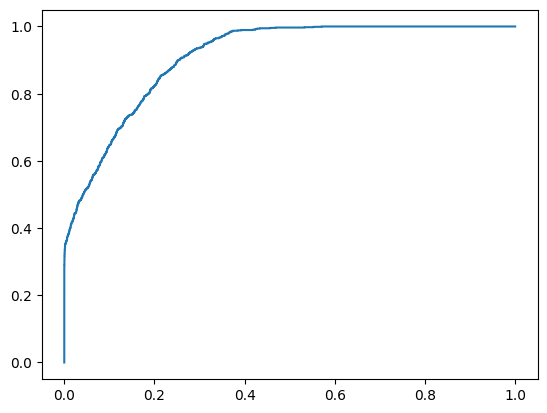

In [ ]:
model_train_val_eval(train_x,test_x,train_y,test_y,final_model)


In [ ]:
import joblib

In [ ]:
joblib.dump(final_model,'/content/gdrive/MyDrive/Colab Notebooks/promotion_pipeline_model.pkl')
# model= joblib.load('promotion_pipeline_model.pkl')

In [ ]:
sub = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sample_submission.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [ ]:
# test=pd.read_csv('test.csv')
# test['region']=test['region'].str.split("_").str[1].astype(int)

In [ ]:
sub['is_promoted'] = final_model.predict(test)

In [ ]:
sub.to_csv('/content/gdrive/MyDrive/Colab Notebooks/sub_1.csv',index=False)

In [ ]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
